In [14]:
import sys
import os
from dotenv import load_dotenv

#1. load environment variables and data

# load environment variables
load_dotenv()

#add working directory to sys path to execute utils/dataset.py
working_dir = os.environ.get("WORKING_DIRECTORY")
sys.path.insert(0, working_dir)

In [15]:
from utils.dataset import get_data 

df = get_data()

Loading data from wines: 8000it [00:00, 9855.85it/s]


In [16]:
#2. Check the first and last few rows of the dataset to get a quick overview of the data using the head() and tail() methods.

df.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


In [17]:
# describe the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,8000.000000,8000.000000,7994.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6.856625,0.278486,0.334929,6.406219,49.324446,934.437470,285.652011,236.327565,0.045875,35.191567,138.605856,0.994046,3.187270,0.490520,10.507502,6.561750
std,0.841727,0.100296,0.120249,5.104317,29.086962,270.488368,76.881459,71.298176,0.022340,17.079654,42.704772,0.003024,0.150369,0.114318,1.227373,8.757213
min,3.800000,0.080000,0.000000,0.600000,0.035118,93.000000,16.045445,3.000000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,1.000000
25%,6.300000,0.210000,0.270000,1.700000,24.208416,747.295000,233.481329,187.495000,0.036000,23.000000,108.000000,0.991727,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,49.078666,931.025000,284.649716,235.215000,0.043000,34.000000,135.000000,0.993730,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,74.582793,1118.372500,337.955361,284.542500,0.050000,46.000000,168.000000,0.996128,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.230000,65.800000,99.998181,1974.850000,576.761262,514.520000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,99.000000


## 1: Data Cleaning

1.1 - handle null and missing values

In [18]:
#remove missing or null values
df = df.dropna()

1.2 - handle outliers

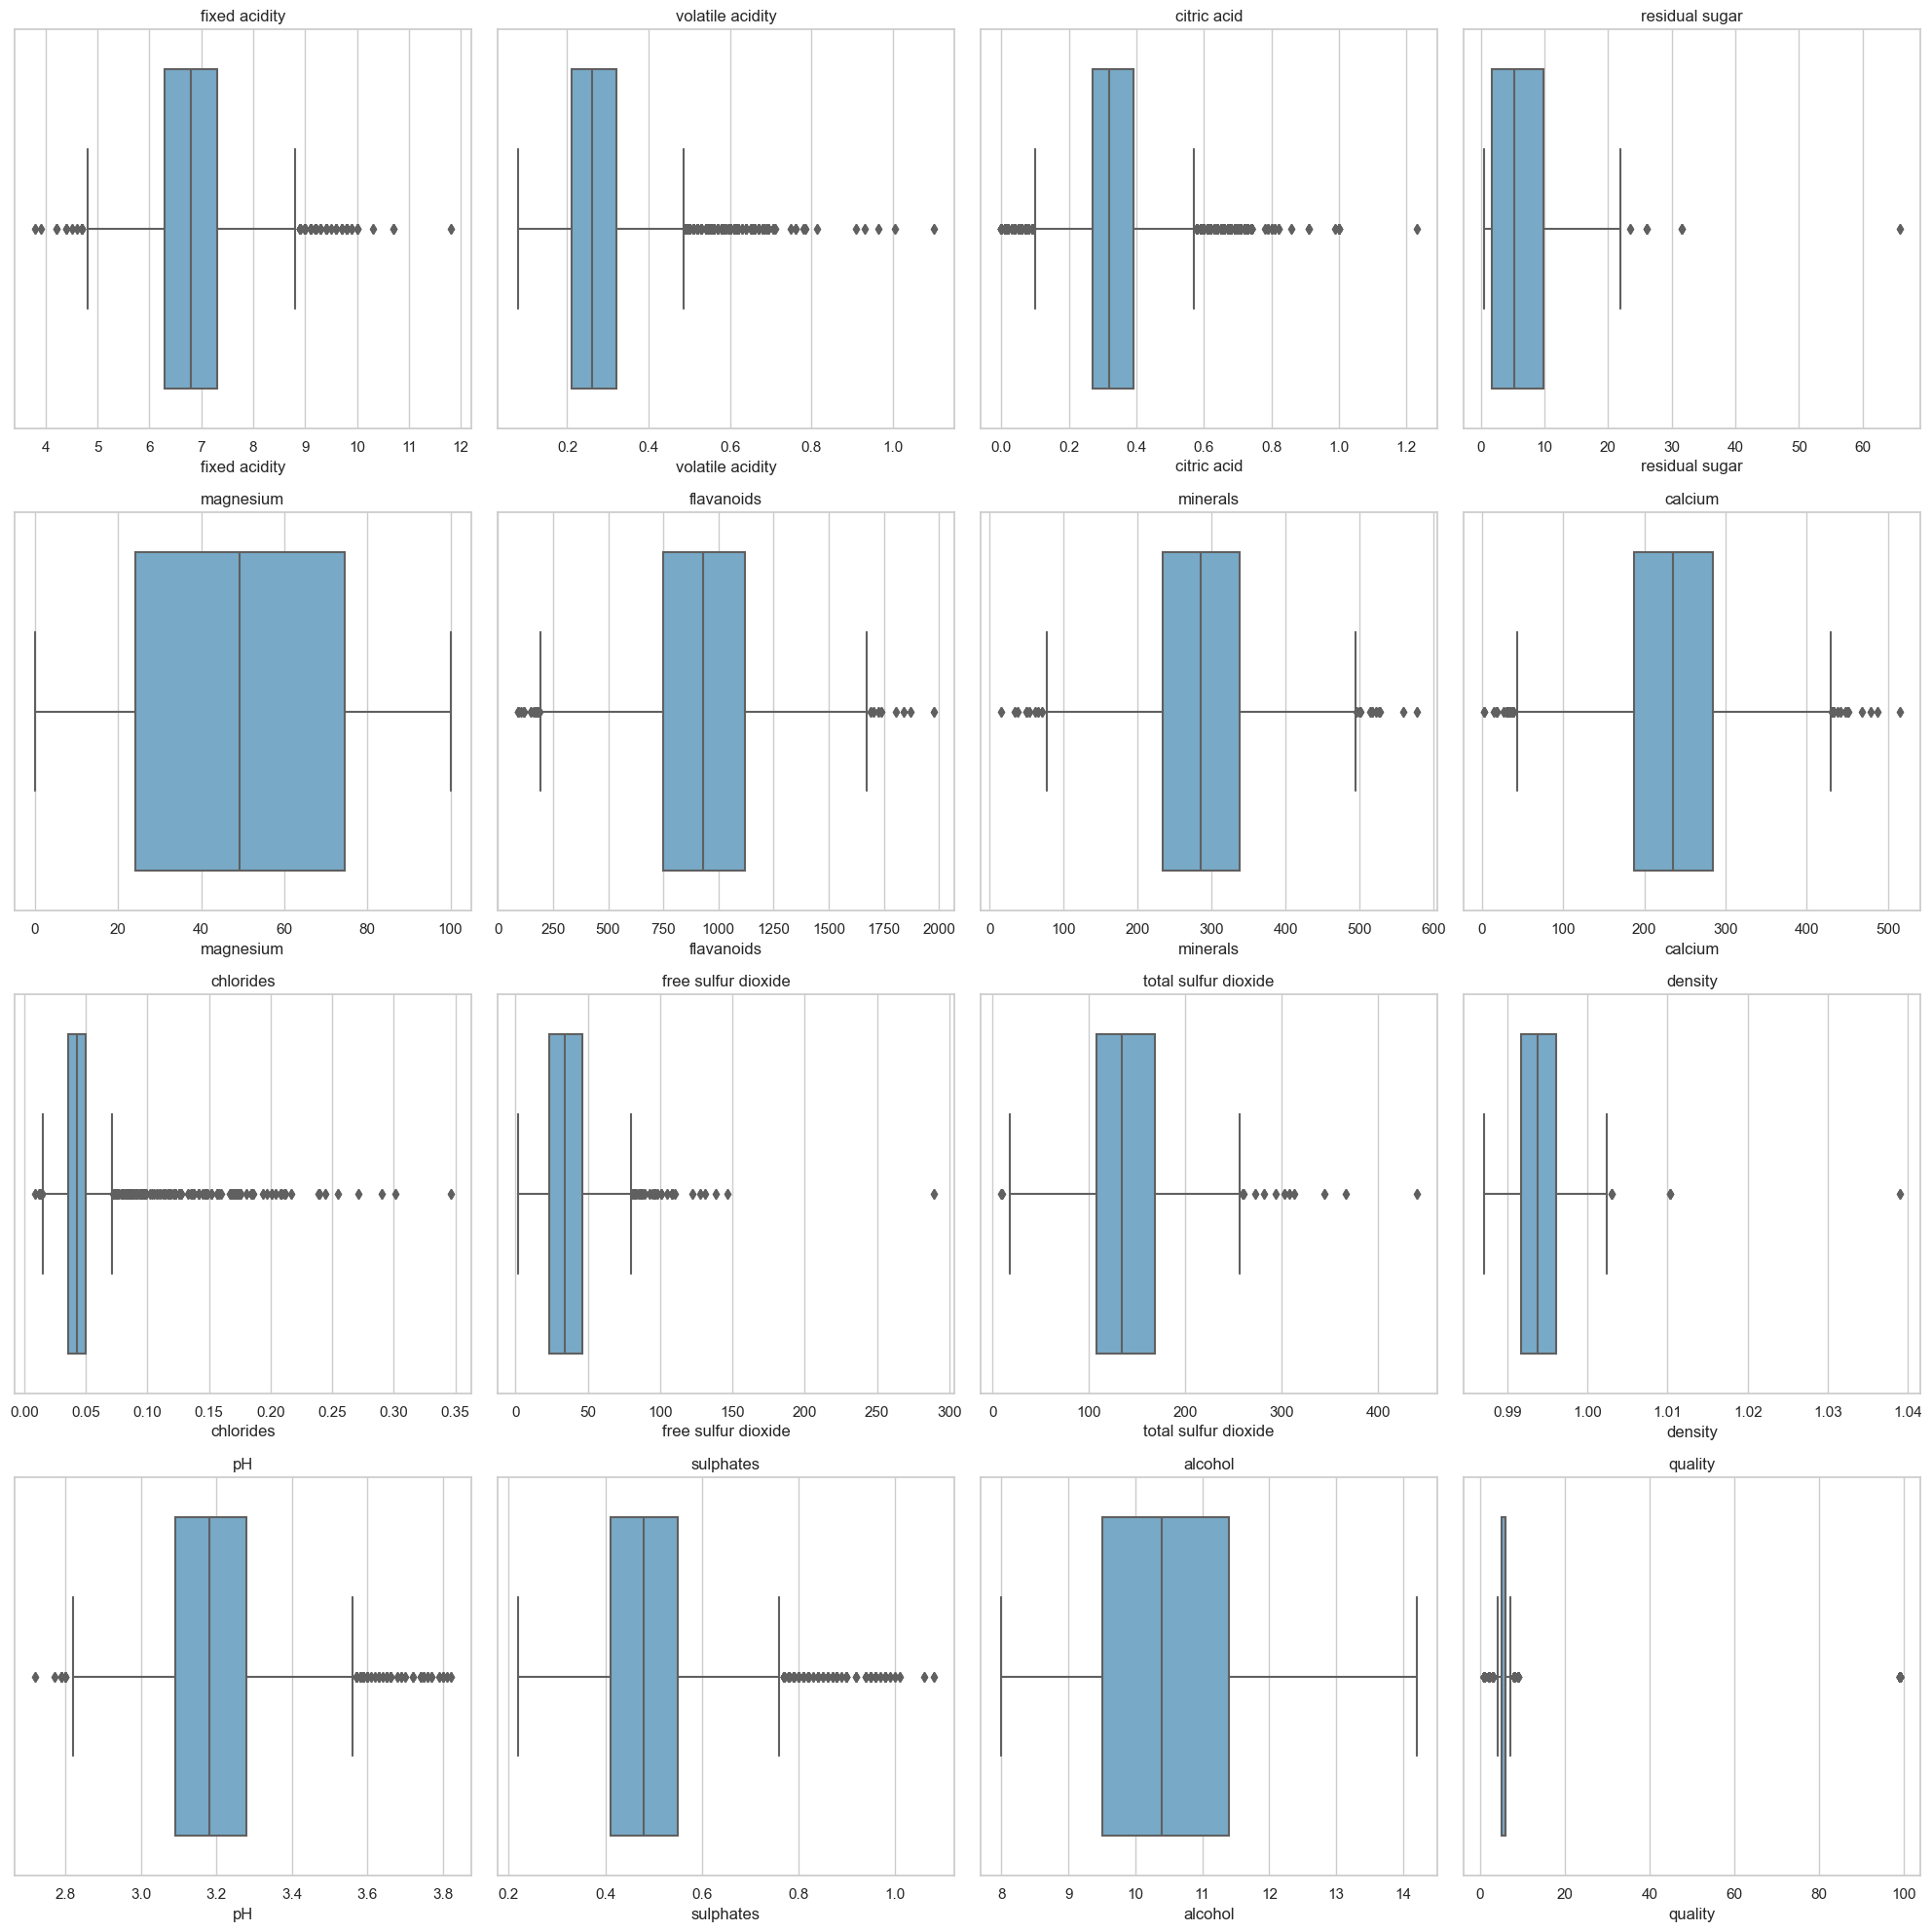

In [19]:
#Check for any outliers in the numerical features (fixed acidity, volatile acidity, citric acid, residual sugar, magnesium, flavanoids, minerals, calcium, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) using box plots.

#plot one boxplot for each numeric feature but show them in a grid
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

#set the size of the plot
plt.figure(figsize=(20, 20))

#plot a boxplot for each numeric feature ignore warnings
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col], palette="Blues")
    plt.title(col)
    plt.tight_layout()
    #remove warnings



Outliers with IQR

C:\Users\LucaH\AppData\Local\Temp\ipykernel_404\1162374042.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\LucaH\AppData\Local\Temp\ipykernel_404\1162374042.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\LucaH\AppData\Local\Temp\ipykernel_404\1162374042.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


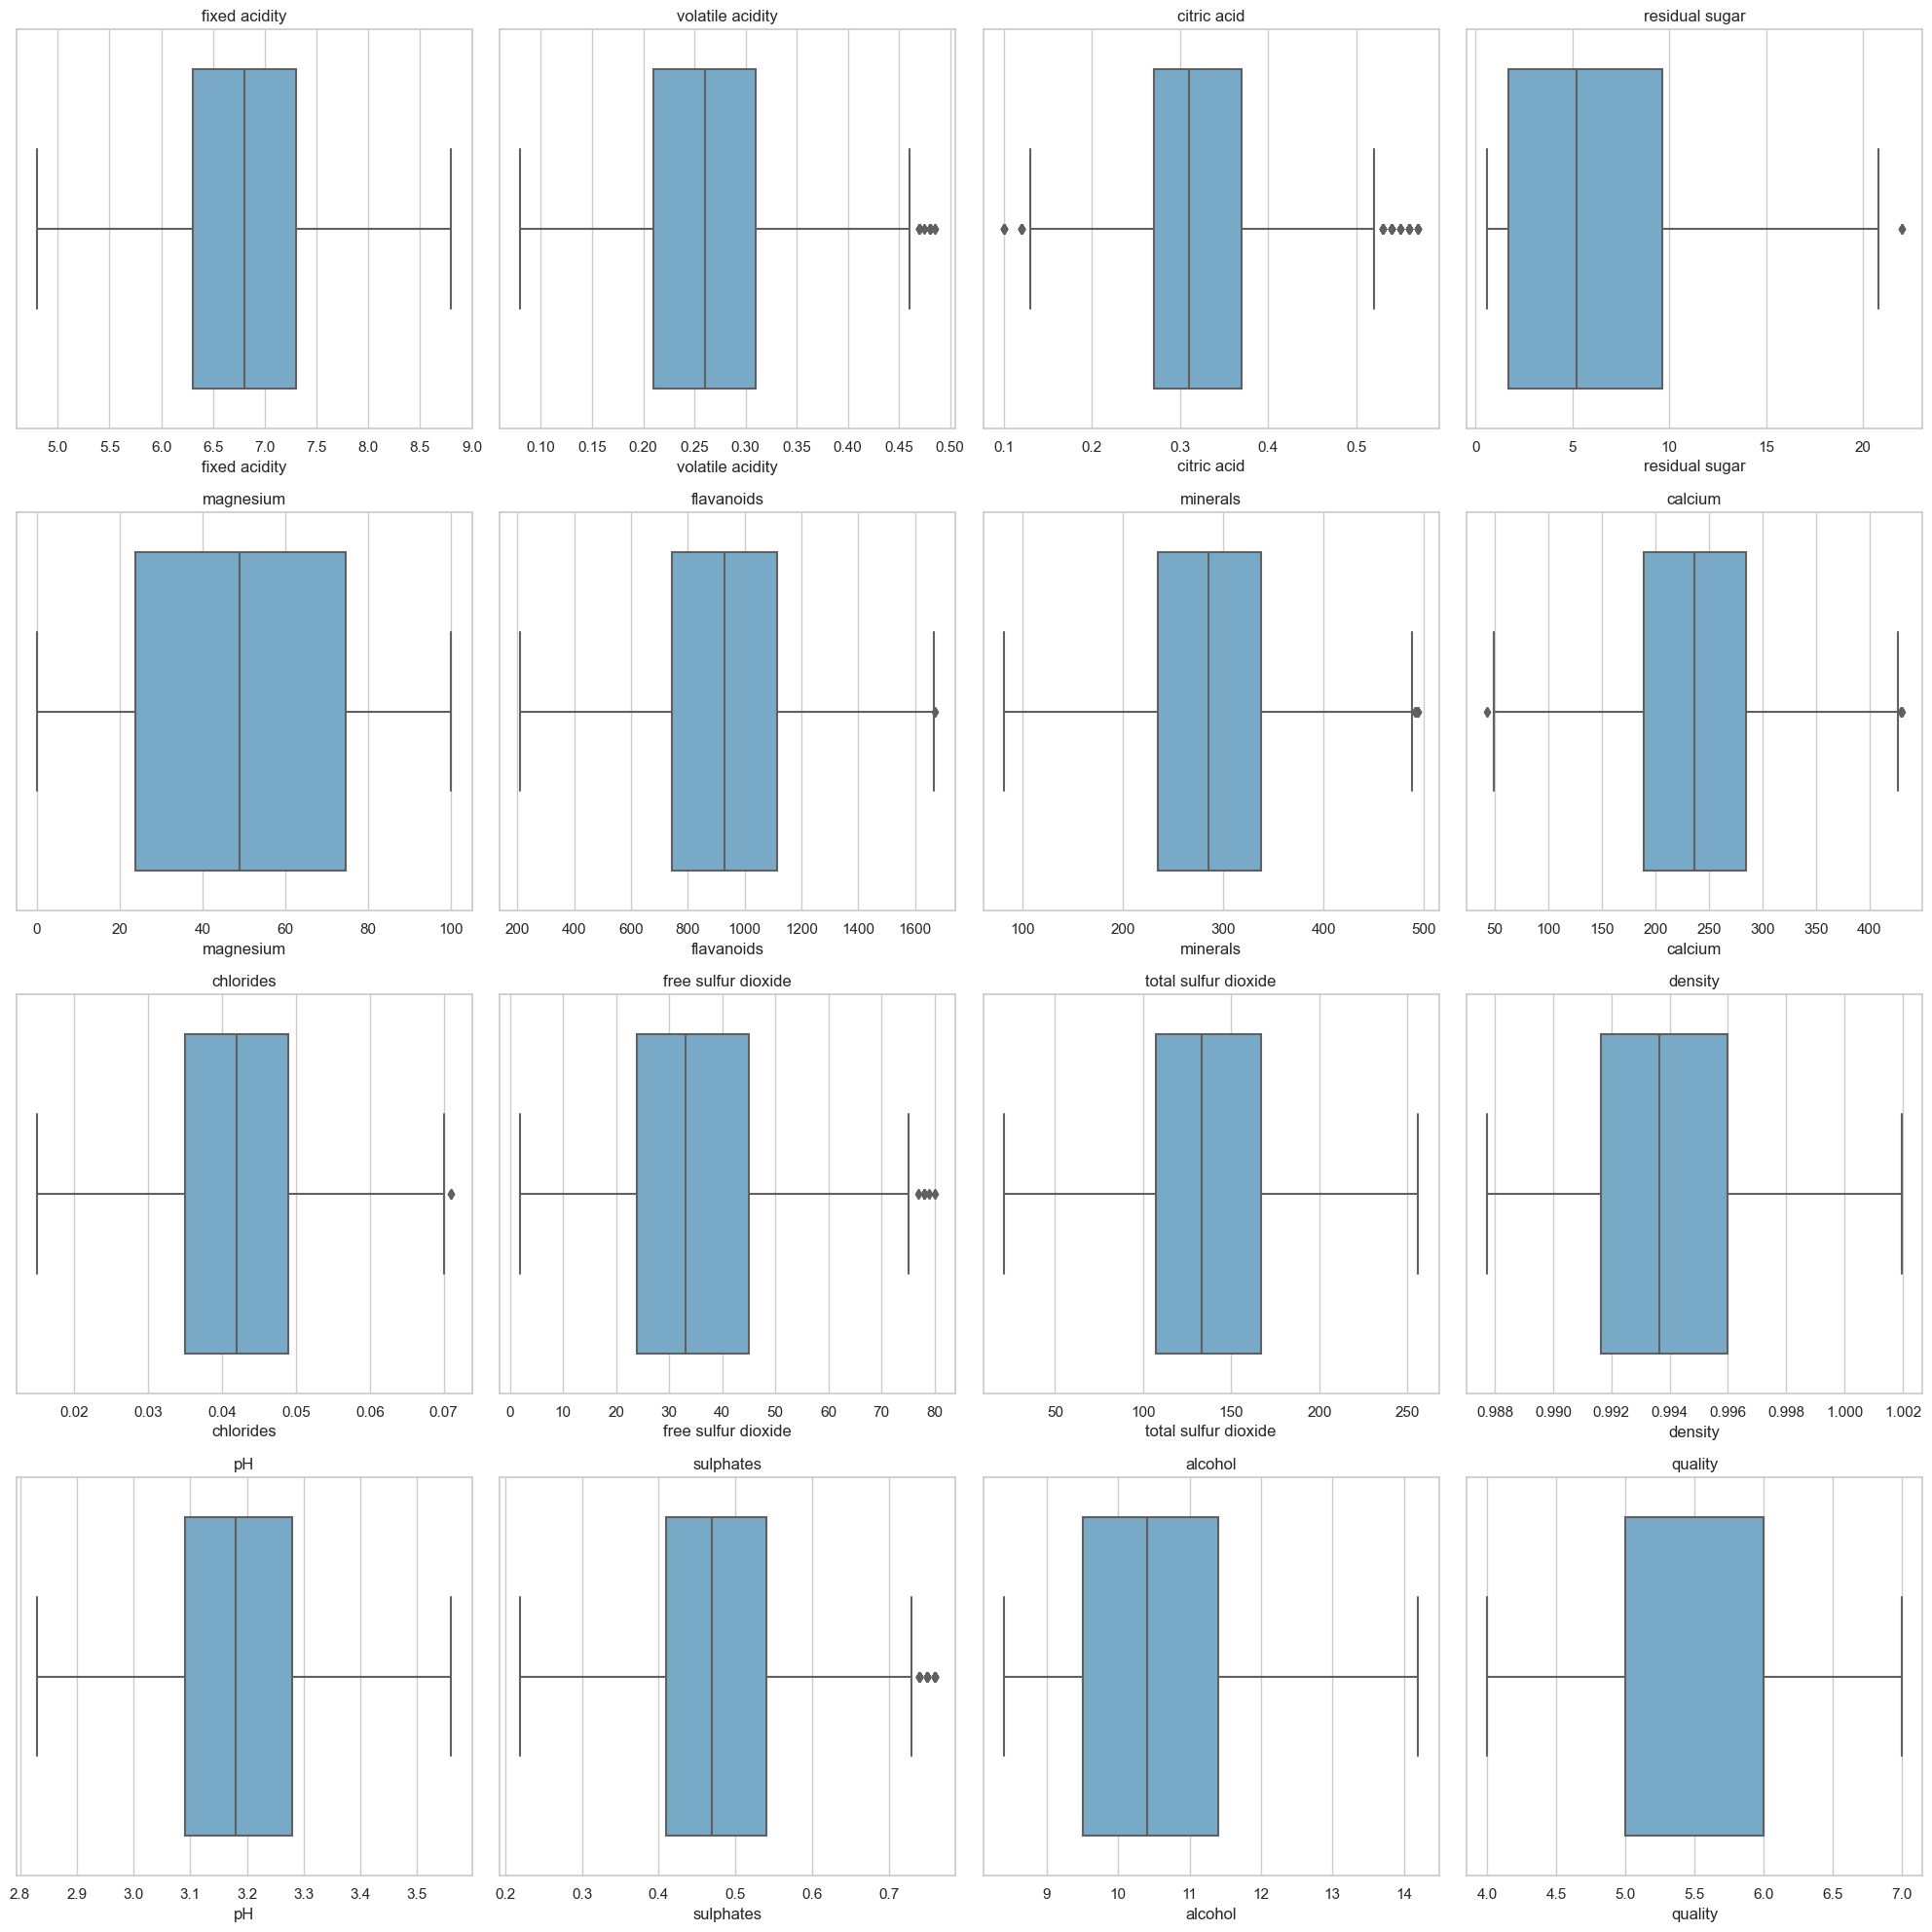

In [20]:
#handle outliers for all features (fixed acidity, volatile acidity, citric acid, residual sugar, magnesium, flavanoids, minerals, calcium, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol)
#use statistical technique interquartile range (IQR) to detect and remove outliers.

#calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#remove outliers
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#plot boxplots again to check if outliers have been removed
#set the size of the plot
plt.figure(figsize=(20, 20))

#plot a boxplot for each numeric feature ignore warnings
for i, col in enumerate(df_iqr.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df_iqr[col], palette="Blues")
    plt.title(col)
    plt.tight_layout()


In [22]:
df.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


outliers with z-score

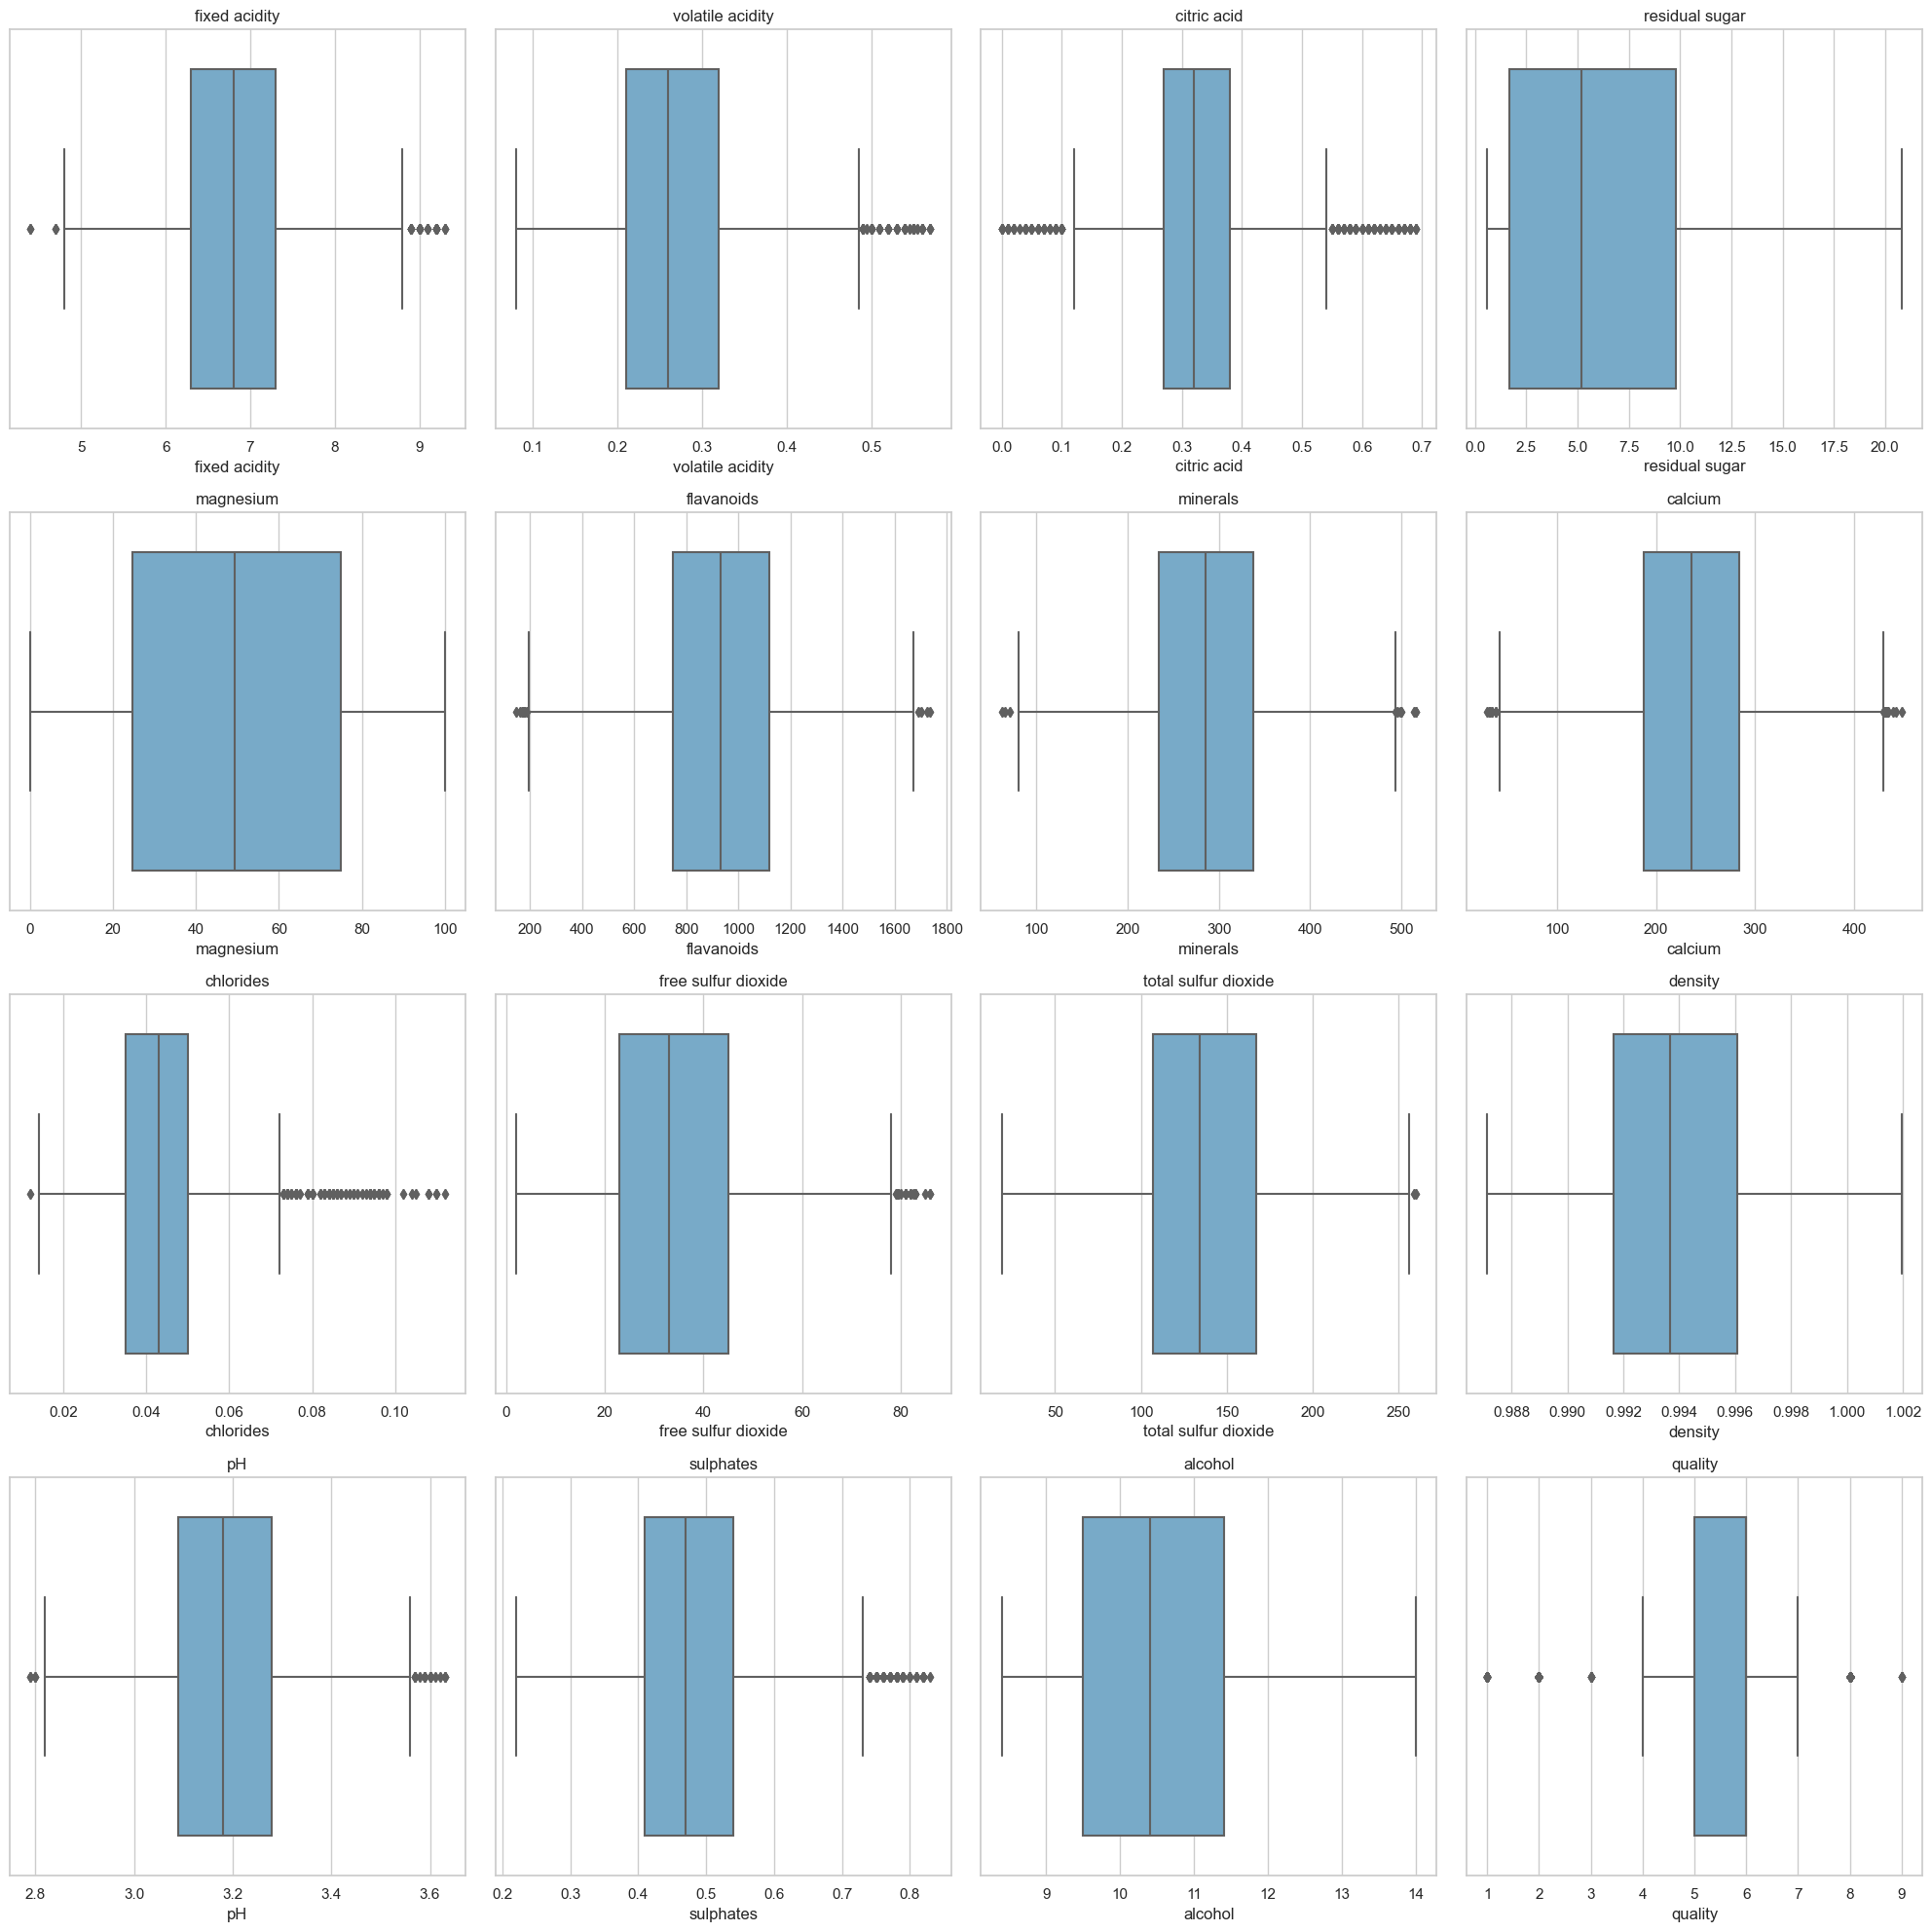

In [23]:
#handle outliers for all numeric features (fixed acidity, volatile acidity, citric acid, residual sugar, magnesium, flavanoids, minerals, calcium, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol)
#use statistical technique z-score to detect and remove outliers.

#calculate the z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[df.select_dtypes(include=['float64', 'int64']).columns]))

#remove outliers
df_z = df[(z < 3).all(axis=1)]

#plot boxplots again to check if outliers have been removed
#set the size of the plot
plt.figure(figsize=(20, 20))

#plot a boxplot for each numeric feature ignore warnings
for i, col in enumerate(df_z.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df_z[col], palette="Blues")
    plt.title(col)
    plt.tight_layout()


In [30]:
#count the rows for the original dataset, the dataset with outliers removed using IQR and the dataset with outliers removed using z-score
print("Number of rows in original dataset: ", df.shape[0])
print("Number of rows after outliers removed using IQR: ", df_iqr.shape[0])
print("Number of rows after outliers removed using z-score: ", df_z.shape[0])



Number of rows in original dataset:  7986
Number of rows after outliers removed using IQR:  5952
Number of rows after outliers removed using z-score:  7206


In [32]:
#write both datasets to csv files
df_iqr.to_csv(working_dir + "/data/processed/wine-iqr.csv", index=False)
df_z.to_csv(working_dir + "/data/processed/wine-z.csv", index=False)
